In [50]:
import numpy as np
from pylab import *
import matplotlib

import pandas 

import datetime




In [79]:
# 2022-11-21 20:00:00

def parsetime(s):
    v=s
    try:
        v=s.decode("utf-8")
    except AttributeError: 
        pass
    return np.datetime64(
        datetime.datetime.strptime(v, '%Y-%m-%d  %H:%M:%S'))

r = parsetime("2022-11-21 20:00:00")

r.astype(np.float64)

1669060800000000.0

In [133]:
dat = np.loadtxt("Cryostat Pressure-data-as-seriestocolumns-2022-12-02 10_22_50.csv", skiprows=1, 
                  delimiter=",")

In [138]:
msec,b,r,z = dat.T
hr = msec / 1e3 / 60 / 60
hr -= hr[0]

 
3.243e-07 x - 7.131e-06
 
1.444e-07 x + 4.742e-07
 
2.175e-07 x - 2.683e-06


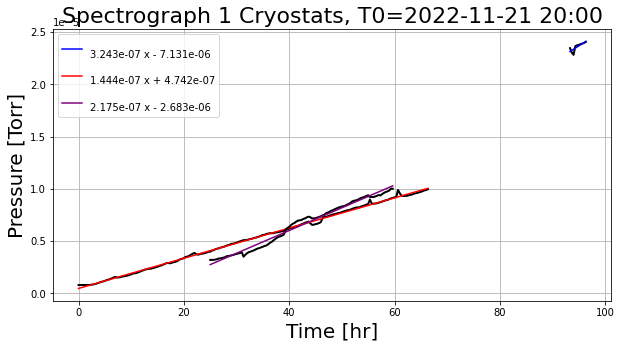

In [156]:

def doit(roi, hr, P, color='red'):
    """ Plot and fit across a roi(slice) of Pressure versus time (hr)"""
    plot(hr[roi], P[roi], lw=2, color='black')
    ff = np.poly1d(np.polyfit(hr[roi], P[roi], 1))
    line, = plot(hr[roi], ff(hr[roi]), color=color)
    line.set_label(str(ff))
    xlabel("Time [hr]", fontsize=20)
    ylabel("Pressure [Torr]", fontsize=20)
    print(ff)

figure(figsize=(10,5))
title("Spectrograph 1 Cryostats, T0=2022-11-21 20:00", fontsize=22)
doit(slice(280,290), hr, b, color='blue')
doit(slice(0,200), hr, r, color='red')
doit(slice(75,180), hr, z, color='purple')
legend()
grid(True)






In [144]:
2.5e-7*24*365

0.00219